In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2],[3,4],[4,3],[8,7],[7,8],[25,80]])

In [3]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 7,  8],
       [25, 80]])

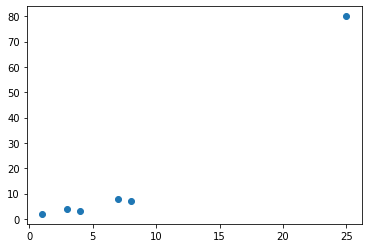

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
db = DBSCAN(eps=3,min_samples=2).fit(X)

In [6]:
db.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [7]:
c = db = DBSCAN(eps=9,min_samples=6).fit(X)

In [8]:
c.labels_# this is because all the min samples need to be 6 but it is not the case due to the outlier 
#in the data  thats why all the points are classified as noice

array([-1, -1, -1, -1, -1, -1], dtype=int64)

In [9]:
# in k_mean model there is a predict function but in db there is no predict method

# An importance difference between k_means and DBScan

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,random_state=0).fit(X)

In [14]:
km.labels_

array([0, 0, 0, 0, 0, 1])

In [15]:
km.predict([[0,0],[12,3]])

array([0, 0])

In [16]:
km.cluster_centers_

array([[ 4.6,  4.8],
       [25. , 80. ]])

In [17]:
# the above are the centers and if new data comes then the distances between these centers are calculated
km.predict([[25,79],[23,78]])

array([1, 1])

# Deciding the optimal value for the epsilon

In [23]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [24]:
X,y = make_blobs(n_samples=200,centers=4,cluster_std=0.60,random_state=0)

In [43]:
X[:5]

array([[ 2.23421043,  1.6934952 ],
       [-1.05510724,  2.6380308 ],
       [ 1.08272576,  4.06271877],
       [-2.60159431,  7.22195591],
       [ 1.60841463,  0.40180054]])

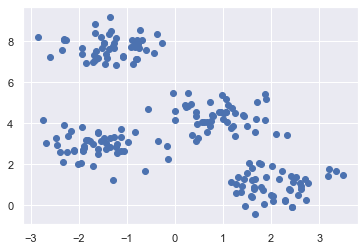

In [25]:
plt.scatter(X[:,0],X[:,1])

In [26]:
samples = [[0,0,0],[0,0.5,0],[1,1,5]]
nn = NearestNeighbors(n_neighbors=1)
nn.fit(samples)

NearestNeighbors(n_neighbors=1)

In [46]:
samples

[[0, 0, 0], [0, 0.5, 0], [1, 1, 5]]

In [29]:
nn.kneighbors([[0,0.4,0.1]])

(array([[0.14142136]]), array([[1]], dtype=int64))

In [30]:
nn.kneighbors([[0.1,0,0.1]])

(array([[0.14142136]]), array([[0]], dtype=int64))

In [31]:
nmn = NearestNeighbors(n_neighbors=2)
nmn.fit(X)
distance , indices = nmn.kneighbors(X)

In [49]:
indices[:4]  # iska matlab ki distances 0 aur 62 ke beech nikala gaya he kyuki vo dono sabse close h

array([[  0,  62],
       [  1,  88],
       [  2, 197],
       [  3,  60]], dtype=int64)

In [47]:
distance[:4]

array([[0.        , 0.00975014],
       [0.        , 0.00975014],
       [0.        , 0.01234906],
       [0.        , 0.01234906]])

In [39]:
distance = np.sort(distance,axis=0)

In [48]:
distance[:4]

array([[0.        , 0.00975014],
       [0.        , 0.00975014],
       [0.        , 0.01234906],
       [0.        , 0.01234906]])

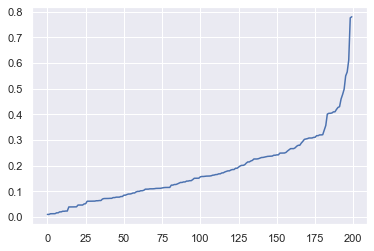

In [41]:
distances = distance[:,1]
plt.plot(distances)

In [155]:
dbscan = DBSCAN(eps=0.6,min_samples=6)  #  0.3   ,  0.4   ,  0.5  are the good points
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=6)

In [156]:
lb = dbscan.fit_predict(X)

In [157]:
clusters = dbscan.labels_

In [158]:
len(set(clusters))

5

In [159]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusters)

0.6224369664741457

In [160]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_) # inertia me sabka sabka wcss ota he

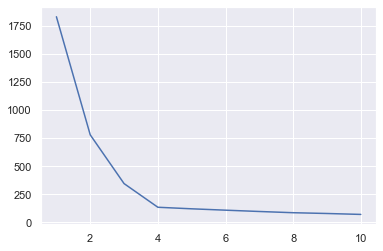

In [161]:
plt.plot(range(1,11),wcss)

In [163]:
km = KMeans(n_clusters=4)
y_mean = km.fit_predict(X)

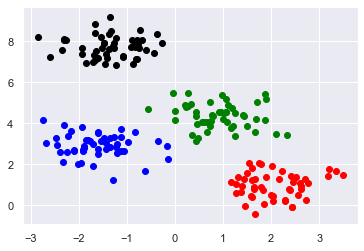

In [164]:
plt.scatter(X[y_mean==0,0],X[y_mean==0,1],color = 'blue')
plt.scatter(X[y_mean==1,0],X[y_mean==1,1],color = 'black')
plt.scatter(X[y_mean==2,0],X[y_mean==2,1],color = 'red')
plt.scatter(X[y_mean==3,0],X[y_mean==3,1],color = 'green')

In [166]:
silhouette_score(X,km.labels_)

0.6796557555696571